In [43]:
from sympy import Symbol, limit, oo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
%precision 6
pd.options.display.float_format = '{:,.6f}'.format

## Study Session 1 - Quantitative Methods 1

### Reading 1 - The Time Value of Money

Learning outcomes
e. "...(PV only)...": An infinite series of cash flows has no future value; for if they did, when?

#### Interest Rates
"In this section, we briefly explain the meaning and <u><i>interpretation</i></u>...": As a contextual meaning.

"2 Technically, 1 plus the nominal rate equals...": This identity in mathematical notation:
$$
1 + TheNominalRate = (1 + TheRealRate) \cdot (1 + TheInflationRate)
$$
and this is to be invistigated later on.

Findings: This equation is named __The Fischer Equation__ after the economist Fischer.
The rationale relates roughly to the purchasing power of a unit of currency. To be futher analysed. 

Translating equation 2 to a Python function for use in the following examples, noting that the equation is
$$
FV_N = PV(1 + r)^N
$$

In [3]:
def FV_N(PV, r, N):
    return PV * (1 + r)**N

##### Solution to Example 1


In [4]:
PV, r, N = 5e6, .07, 5

$FV_N = $

In [5]:
FV_N(PV, r, N)

7012758.653500

##### Solution to Example 2

In [6]:
PV, r, N = 2.5e6, 0.08, 6

$FV_N = $

In [7]:
FV_N(PV, r, N)

3967185.807360

##### Solution to Example 3

In [8]:
PV, r, N = 10e6, 0.09, 15 - 5

$FV_N = $

In [9]:
FV_N(PV, r, N)

23673636.745921

#### Non-Annual Compounding (Future Value)

Translating equation 2 to a Python function for use in the following examples, noting that the equation is
$$
FV_N = PV(1 + \frac{r_s}{m})^{mN}
$$

In [10]:
def FV_N_m(PV, r_s, m, N):
    return FV_N(PV, r_s/m, m*N)

##### Solution to Example 1

In [11]:
FV_N_m(10_000, 0.08, 4, 2)

11716.593810

##### Solution to Example 2

In [12]:
FV_N_m(1_000_000, 0.06, 12, 1)

1061677.811864

#### Continuous Compounding, Stated and Effictive Rates

Equation 4:
$$
FV_N = PV e^{r_s N}
$$

Defining the right-hand-side of equation 4 as a Python function:

In [13]:
def FV_N_c(PV, r_s, N):
   return PV * np.e**(r_s*N) 

##### Solution to Example 6

In [14]:
FV_N_c(10_000, 0.08, 2)

11735.108710

##### Stated and Effective Rates

For an insight into the difference between different compounding frequencies we replicate table 1 below
then we plot a graph to compare the effects of those frequencies assuming other variables fixed.

In [34]:
# Replicate Table 1
frequencies = [1, 2, 4, 12, 356, oo]
table_1 = pd.DataFrame(
    {
        "Frequency": ["Annual", "Semiannual", "Quarterly", "Monthly", "Daily", "Continuous"],
        "r_s/m": [0.08/f for f in frequencies],
        "mN": [f * 1 for f in frequencies]
    },
   dtype=float 
)
table_1

/tmp/ipykernel_601/2132860787.py:3: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  table_1 = pd.DataFrame(


,Frequency,r_s/m,mN
0,Annual,0.08,1.00
1,Semiannual,0.04,2.00
2,Quarterly,0.02,4.00
3,Monthly,0.01,12.00
4,Daily,0.00,356.00
5,Continuous,0.00,inf


In [40]:
def FV_generic(PV, r_s, m, N):
    _m = Symbol('_m')
    return PV * limit((1 + r_s/_m)**(_m*N), _m, m).evalf()

table_1['Futrue Value of $1'] = table_1.apply(lambda row: FV_generic(1, 0.08, row['mN'], 1), axis=1).astype(float)
table_1

,Frequency,r_s/m,mN,Futrue Value of $1
0,Annual,0.080000,1.000000,1.080000
1,Semiannual,0.040000,2.000000,1.081600
2,Quarterly,0.020000,4.000000,1.082432
3,Monthly,0.006667,12.000000,1.083000
4,Daily,0.000225,356.000000,1.083277
5,Continuous,0.000000,inf,1.083287


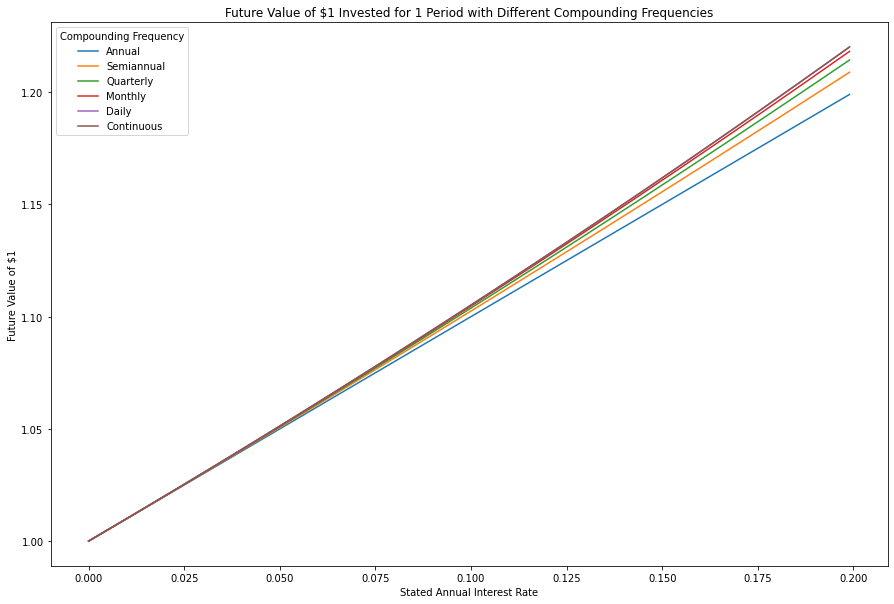

In [44]:
rates = np.arange(0, 0.2, .001)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

frequencies = {'Annual': 1, 'Semiannual': 2, 'Quarterly': 4, 'Monthly': 12, 'Daily': 365, 'Continuous': oo}
for f in frequencies:
    ax.plot(rates, np.vectorize(FV_generic)(1, rates, frequencies[f], 1), label=f)

ax.set_title('Future Value of $1 Invested for 1 Period with Different Compounding Frequencies', )
ax.set_xlabel('Stated Annual Interest Rate')
ax.set_ylabel('Future Value of $1')
ax.legend()
ax.legend(title='Compounding Frequency')

plt.show()

---

We here encode a few imporant identies for future reference.

$$
EAR = (1 + \frac{r_s}{m})^m - 1
$$
where $EAR$ is the __Effictive Annual Rate__, $r_s$ is the __Stated Annual Rate__, and $m$ is the frequency  
of compounding per annum.

In the case of continuous compounding:
$$
EAR = e^{r_s} - 1
$$
where $e$ is Euler's number, and $r_s$ is as the previous equation.

To find the __stated annual interest rate__ from the previous equation, given the $EAR$, we proceed as follows:

$$ EAR + 1 = e^{r_s} $$
$$ \ln{(EAR + 1)} = \ln{e^{r_s}} $$
$$ \ln{(EAR + 1)} = r_s $$